# seaborn
## kdeplot
A kernel density estimate (KDE) plot is a method for visualizing the distribution of observations in a dataset, **analagous to a histogram**. KDE represents the data using a continuous probability density curve in one or more dimensions.  
kdeplot可用于对单变量和双变量进行核密度估计并可视化，其主要参数如下：  

* data：一维数组，单变量时作为唯一的变量

* data2：格式同data2，单变量时不输入，双变量作为第2个输入变量
  
* shade：bool型变量，用于控制是否对核密度估计曲线下的面积进行色彩填充，True代表填充  
* vertical：bool型变量，在单变量输入时有效，用于控制是否颠倒x-y轴位置  
* kernel：字符型输入，用于控制核密度估计的方法，默认为'gau'，即高斯核，特别地在2维变量的情况下仅支持高斯核方法  
* legend：bool型变量，用于控制是否在图像上添加图例

* cumulative：bool型变量，用于控制是否绘制核密度估计的累计分布，默认为False

* shade_lowest：bool型变量，用于控制是否为核密度估计中最低的范围着色，主要用于在同一个坐标轴中比较多个不同分布总体，默认为True
* cbar：bool型变量，用于控制是否在绘制二维核密度估计图时在图像右侧边添加比色卡
 
* color：字符型变量，用于控制核密度曲线色彩，同plt.plot()中的color参数，如'r'代表红色
 
* cmap：字符型变量，用于控制核密度区域的递进色彩方案，同plt.plot()中的cmap参数，如'Blues'代表蓝色系
 
* n_levels：int型，在而为变量时有效，用于控制核密度估计的区间个数，反映在图像上的闭环层数

In [40]:
import seaborn as sns

import matplotlib as plt
%matplotlib inline

In [41]:
print(sns.__version__)

0.10.1


In [2]:
iris = sns.load_dataset('iris')

In [3]:
setosa = iris.loc[iris.species == 'setosa'].reset_index(drop = True)

In [6]:
iris.tail()

,sepal_length,sepal_width,petal_length,petal_width,species
145,6.7,3.0,5.2,2.3,virginica
146,6.3,2.5,5.0,1.9,virginica
147,6.5,3.0,5.2,2.0,virginica
148,6.2,3.4,5.4,2.3,virginica
149,5.9,3.0,5.1,1.8,virginica


In [7]:
setosa.tail()

,sepal_length,sepal_width,petal_length,petal_width,species
45,4.8,3.0,1.4,0.3,setosa
46,5.1,3.8,1.6,0.2,setosa
47,4.6,3.2,1.4,0.2,setosa
48,5.3,3.7,1.5,0.2,setosa
49,5.0,3.3,1.4,0.2,setosa


In [8]:
virginica = iris.loc[iris.species == 'virginica'].reset_index(drop = True)

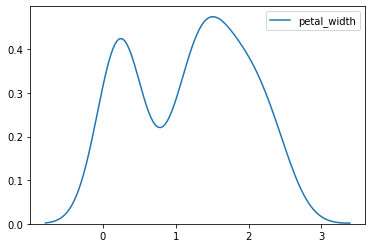

In [9]:
# basic kdeplot
ax = sns.kdeplot(iris.petal_width)

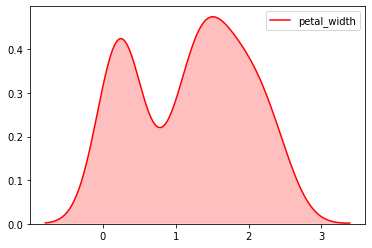

In [10]:
# add shade
ax = sns.kdeplot(iris.petal_width, shade = True, color = 'r')

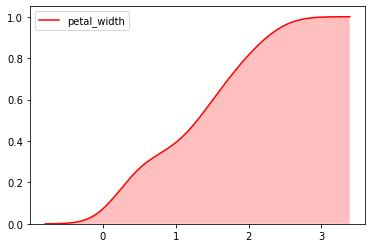

In [11]:
# make accumulative plot
ax = sns.kdeplot(iris.petal_width,
                shade = True,
                color = 'r',
                cumulative= True)

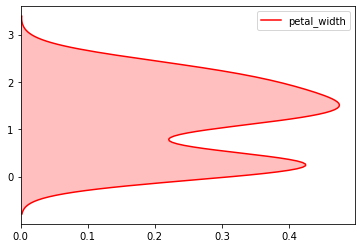

In [12]:
# the orientation of the plot
ax = sns.kdeplot(iris.petal_width,
                shade = True,
                color = 'r',
                vertical=True)

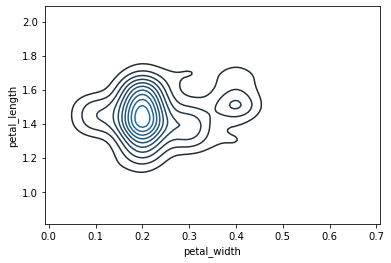

In [13]:
# kdeplot with two variables
ax = sns.kdeplot(setosa.petal_width,
                setosa.petal_length)

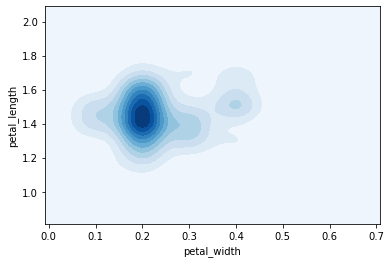

In [14]:
# change the cmap and shade_lowest
ax = sns.kdeplot(setosa.petal_width,
                setosa.petal_length,
                cmap = 'Blues',
                shade=True,
                shade_lowest=True)

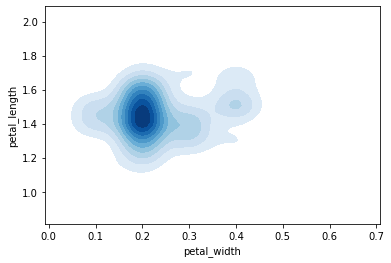

In [17]:
# shade_lowest with clean background
ax = sns.kdeplot(setosa.petal_width,
                setosa.petal_length,
                cmap = 'Blues',
                shade=True,
                shade_lowest=False
                )

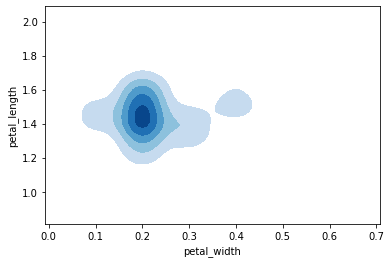

In [18]:
# change the color layers/levels
ax = sns.kdeplot(setosa.petal_width,
                setosa.petal_length,
                cmap = 'Blues',
                shade=True,
                shade_lowest=False,
                n_levels=5
                )

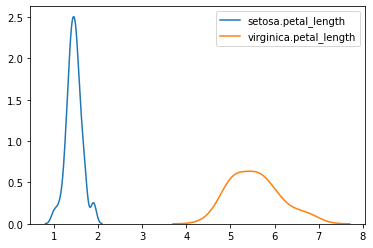

In [19]:
# draw two kdeplots in one plot with labels
ax1 = sns.kdeplot(setosa.petal_length,label='setosa.petal_length')
ax2 = sns.kdeplot(virginica.petal_length, label='virginica.petal_length')

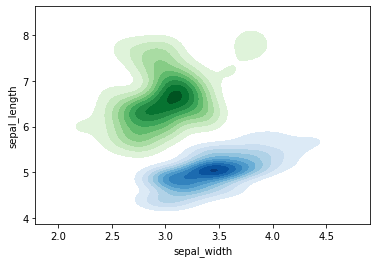

In [23]:
ax1 = sns.kdeplot(setosa.sepal_width,
                setosa.sepal_length,
                cmap = 'Blues',
                shade=True,
                shade_lowest=False
                )
ax2 = sns.kdeplot(virginica.sepal_width,
                virginica.sepal_length,
                cmap = 'Greens',
                shade=True,
                shade_lowest=False
                )

## rugplot
Plot marginal distributions by drawing ticks along the x and y axes.  

This function is intended to complement other plots by **showing the location of individual observations** in an unobstrusive way.
rugplot的功能非常朴素，用于绘制出一维数组中数据点实际的分布位置情况，即不添加任何数学意义上的拟合，单纯的将记录值在坐标轴上表现出来，相对于kdeplot，其可以展示原始的数据离散分布情况，其主要参数如下：

* a：一维数组，传入观测值向量

* height：设置每个观测点对应的小短条的高度，默认为0.05

* axis：字符型变量，观测值对应小短条所在的轴，默认为'x'，即x轴

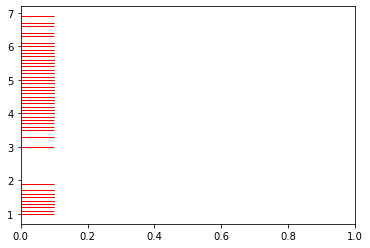

In [25]:
ax = sns.rugplot(iris.petal_length, axis='y',color ='r', height = 0.1)

## displot
seaborn中的distplot主要功能是绘制单变量的直方图，且还可以在直方图的基础上施加kdeplot和rugplot的部分内容，是一个功能非常强大且实用的函数，其主要参数如下：

Params:

* a：一维数组形式，传入待分析的单个变量
 
* bins：int型变量，用于确定直方图中显示直方的数量，默认为None，这时bins的具体个数由Freedman-Diaconis准则来确定
 
* hist：bool型变量，控制是否绘制直方图，默认为True
 
* kde：bool型变量，控制是否绘制核密度估计曲线，默认为True
 
* rug：bool型变量，控制是否绘制对应rugplot的部分，默认为False
 
* fit：传入scipy.stats中的分布类型，用于在观察变量上抽取相关统计特征来强行拟合指定的分布，下文的例子中会有具体说明，默认为None，即不进行拟合
 
* hist_kws,kde_kws,rug_kws：这几个变量都接受字典形式的输入，键值对分别对应各自原生函数中的参数名称与参数值，在下文中会有示例
 
* color：用于控制除了fit部分拟合出的曲线之外的所有对象的色彩
 
* vertical：bool型，控制是否颠倒x-y轴，默认为False，即不颠倒
 
* norm_hist：bool型变量，用于控制直方图高度代表的意义，为True直方图高度表示对应的密度，为False时代表的是对应的直方区间内记录值个数，默认为False
 
* label：控制图像中的图例标签显示内容

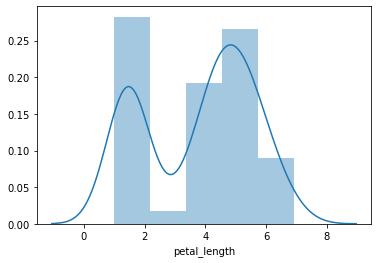

In [26]:
# basic distplot
ax = sns.distplot(iris.petal_length)

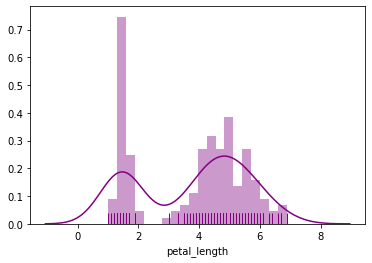

In [27]:
# add fug, and change bin value
ax = sns.distplot(iris.petal_length, color= 'purple',
                 rug = True, bins = 20)

**在上图的基础上强行拟合卡方分布并利用参数字典设置fit曲线为绿色：  
fit $chi^2$ distribution and color the path**

In [30]:
from scipy.stats import chi2

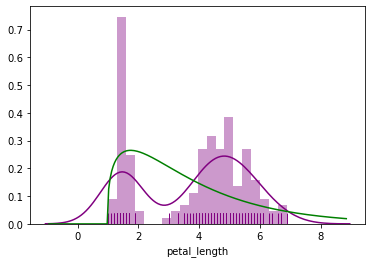

In [31]:
ax = sns.distplot(iris.petal_length, 
                  color= 'purple',
                  rug = True, 
                  bins = 20, fit = chi2, fit_kws={'color':'g'})

**修改norm_hist参数为False使得纵轴显示的不再是密度而是频数（注意这里必须关闭kde和fit绘图的部分，否则纵轴依然显示密度），利用hist_kws传入字典调整直方图部分色彩和透明度，利用rug_kws传入字典调整rugplot部分小短条色  
y axis: density -> frequency**

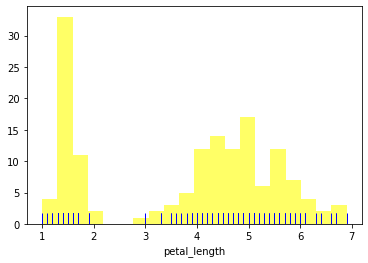

In [34]:
ax = sns.distplot(iris.petal_length, 
                  color= 'purple',
                  rug = True,
                  kde = False, # for frequency
                  bins = 20, 
                  fit = None, # for frequency
                  hist_kws={'color':'yellow', 'alpha':0.6},
                 rug_kws = {'color':'b'},
                 norm_hist=False # for frequency
                 )

## jointplot

Draw a plot of two variables with bivariate and univariate graphs.

This function provides a convenient interface to the JointGrid class, with several canned plot kinds. This is intended to be a fairly lightweight wrapper; if you need more flexibility, you should use JointGrid directly.   

Params:  

* x,y：代表待分析的成对变量，有两种模式，第一种模式：在参数data传入数据框时，x、y均传入字符串，指代数据框中的变量名；第二种模式：在参数data为None时，x、y直接传入两个一维数组，不依赖数据框
 
* data：与上一段中的说明相对应，代表数据框，默认为None
 
* kind：字符型变量，用于控制展示成对变量相关情况的主图中的样式
 
* color：控制图像中对象的色彩
 
* height：控制图像为正方形时的边长
 
* ratio：int型，调节联合图与边缘图的相对比例，越大则边缘图越矮，默认为5
 
* space：int型，用于控制联合图与边缘图的空白大小
 
* xlim,ylim：设置x轴与y轴显示范围
 
* joint_kws,marginal_kws,annot_kws：传入参数字典来分别精细化控制每个组件

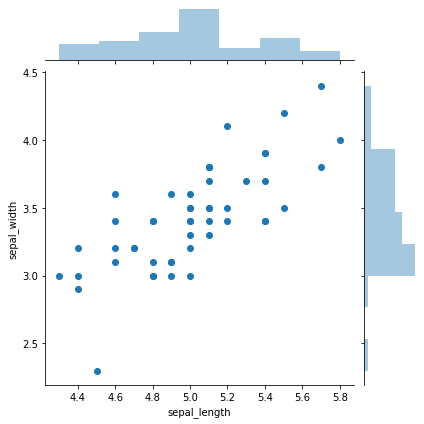

In [35]:
ax = sns.jointplot(x='sepal_length', y='sepal_width', data=setosa)

利用边缘图形参数字典为边缘图形添加rugplot的内容，并修改直方个数为15：

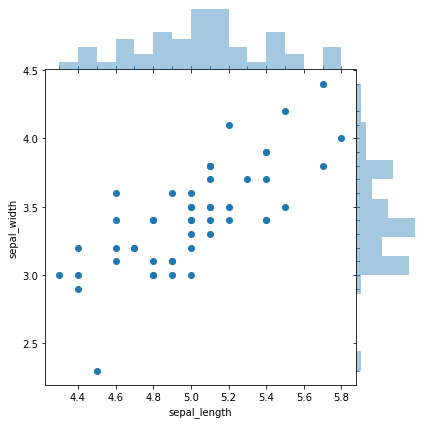

In [63]:
ax = sns.jointplot(x='sepal_length', y='sepal_width', data=setosa,
                  marginal_kws=dict(bins=15, rug=True),
                  linewidth=1,space=0)

将kind参数设置为'reg'，为联合图添加线性回归拟合直线与核密度估计结果：  
**regression**

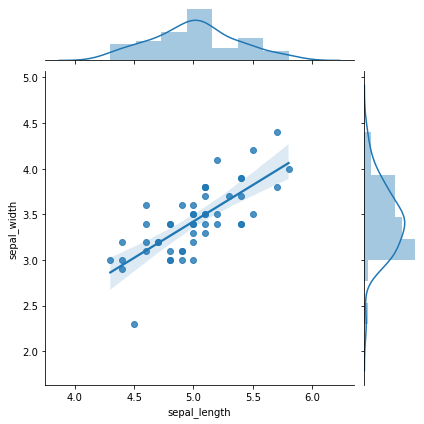

In [44]:
ax = sns.jointplot(x='sepal_length', y='sepal_width', data=setosa,
                  kind='reg')

六边形图 hexagon plot

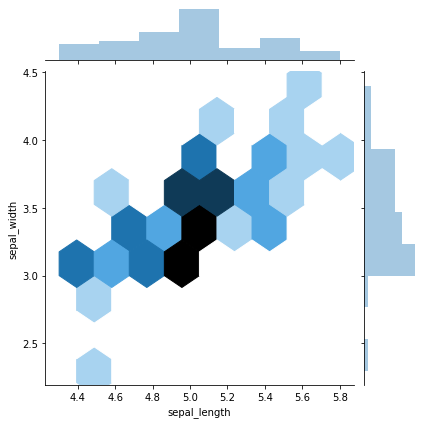

In [45]:
ax = sns.jointplot(x='sepal_length', y='sepal_width', data=setosa,
                  kind='hex')

修改kind为'kde'来将直方图和散点图转换为核密度估计图，并将边际轴的留白大小设定为0：

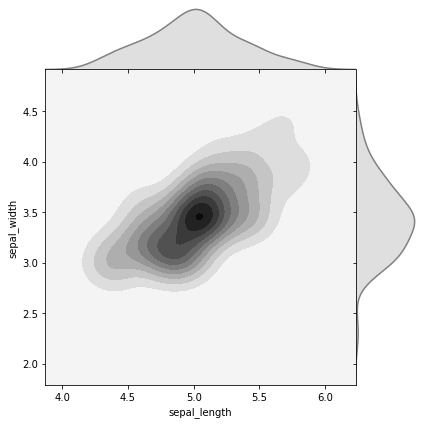

In [48]:
ax = sns.jointplot(x='sepal_length', y='sepal_width', data=setosa,
                  kind='kde', space = 0, color='grey')

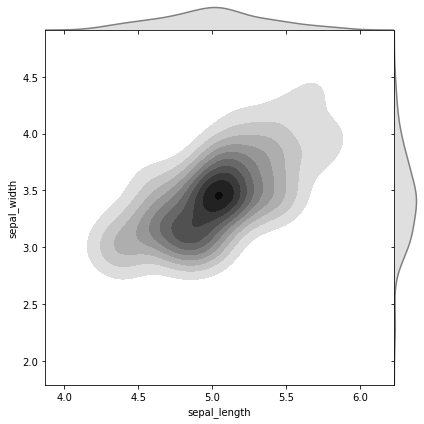

In [59]:
# adjust the ratio of joint axes height to marginal axes height.
ax = sns.jointplot(x='sepal_length', y='sepal_width', data=setosa,
                   kind='kde',
                   space=0,
                   color='grey',
                   shade_lowest=False,
                   ratio=15)

jointplot还支持图层叠加，如下面的例子，我们首先绘制出的联合图中kind限制为拟合线性回归直线，在此基础上利用.plot_joint方法叠加核密度估计图层：  
**more layers of plots**

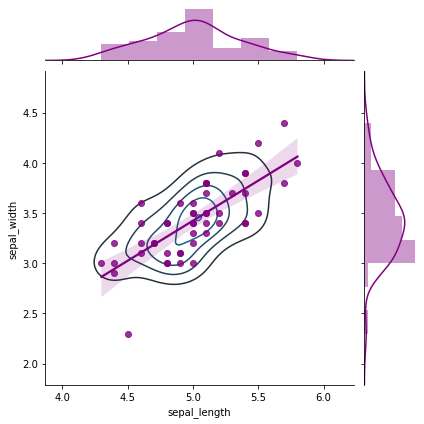

In [53]:
ax = (sns.jointplot(x='sepal_length', y='sepal_width', data=setosa,
                   color='purple',
                   kind = 'reg')).plot_joint(sns.kdeplot,
                                             zorder=0, n_levels=5) # zorder is the order of the layers